In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset = pd.read_csv("cost_churn.csv")

In [3]:
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
dataset.shape

(7043, 21)

In [5]:
dataset.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [6]:
dataset.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
dataset.describe()
# senior citizen is categprical hense the 25% 50% 85% distribution is 0
# 75% customers have tenuere less thn 75%
# average monthly charges are 64.7 but 75% customers pay moer then 89 

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
dataset['Churn'].value_counts()


No     5174
Yes    1869
Name: Churn, dtype: int64

In [9]:
dataset['Churn'].value_counts()/len(dataset['Churn'])*100

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

In [10]:
#   it is a highly imbalanced data

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [12]:
telco_data = dataset.copy()

In [13]:
telco_data.TotalCharges = pd.to_numeric(telco_data.TotalCharges, errors = 'coerce')

In [14]:
telco_data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [15]:
telco_data.loc[telco_data['TotalCharges'].isnull()==True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [16]:
# removing missing values
telco_data.dropna(how = 'any')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [17]:
telco_data['tenure'].max()

72

In [18]:
 labels = ["{0}-{1}".format(i,i+11) for i in range(1,72,12)]

In [19]:
telco_data['tenure_group'] = pd.cut(telco_data.tenure, range(1,80,12), right = False, labels = labels)

In [20]:
telco_data['tenure_group'].value_counts()

1-12     2175
61-72    1407
13-24    1024
25-36     832
49-60     832
37-48     762
Name: tenure_group, dtype: int64

In [21]:
# removing cust_id and tenure columns
telco_data.drop(columns = ['customerID','tenure'],axis =1, inplace=True)

In [22]:
telco_data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'tenure_group'],
      dtype='object')

In [23]:
telco_data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1-12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25-36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1-12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37-48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1-12


In [24]:
# Explorative data analysis

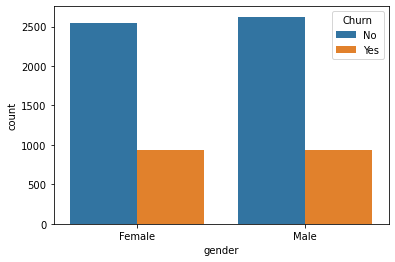

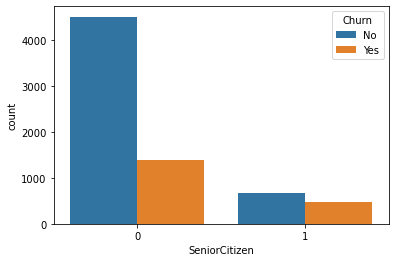

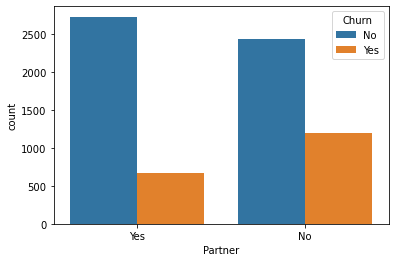

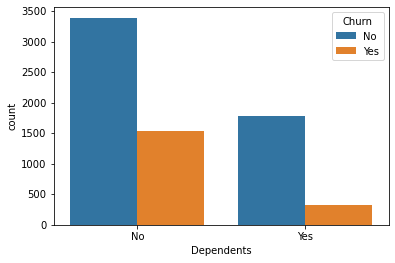

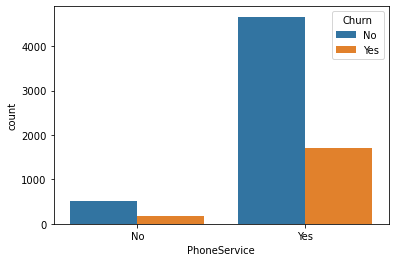

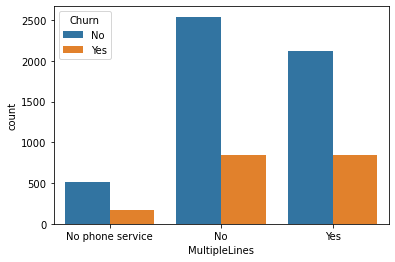

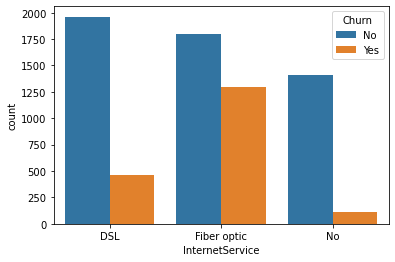

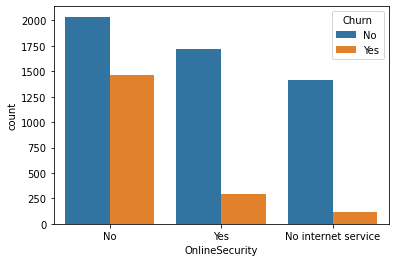

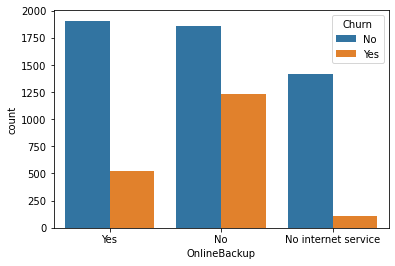

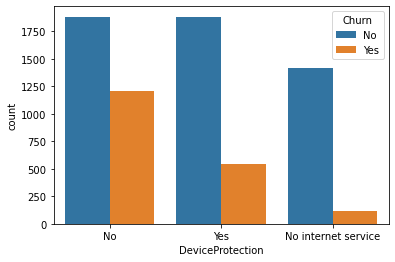

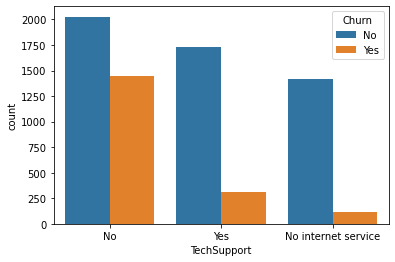

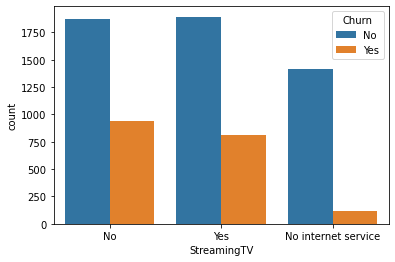

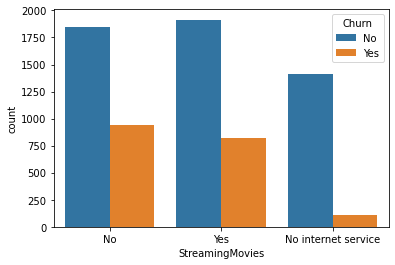

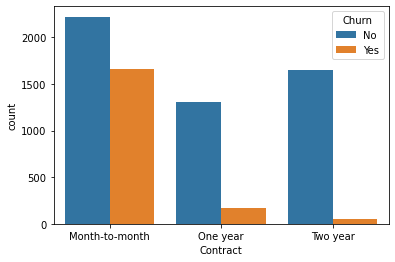

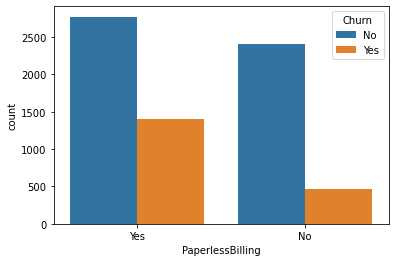

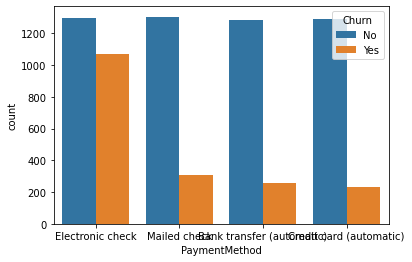

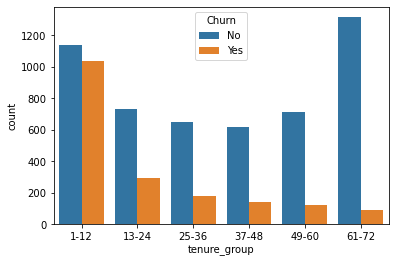

In [25]:
# plotting the graph with sns countplot
for i, predictor in enumerate(telco_data.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=telco_data, x=predictor, hue="Churn")

as we can see:
gender is not a important feature as female and male have almost same churning numbers
senior citizens are more likely to churn
churner ratio is high when somebody is not a partner
dependents are less likely to churn, etc

In [26]:
# converting the target variabke in binary

In [27]:
telco_data["Churnn"] = np.where(telco_data.Churn=="Yes",1,0)

In [28]:
telco_data["Churn"]

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: object

In [29]:
# converting caterogical variables into dummy variables

In [30]:
telco_data_dummies = pd.get_dummies(telco_data)

In [31]:
telco_data_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churnn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes,tenure_group_1-12,tenure_group_13-24,tenure_group_25-36,tenure_group_37-48,tenure_group_49-60,tenure_group_61-72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,1,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,1,1,0,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,1,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,0,0,1,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,1,0,0,1,1,0,0,0,0,0


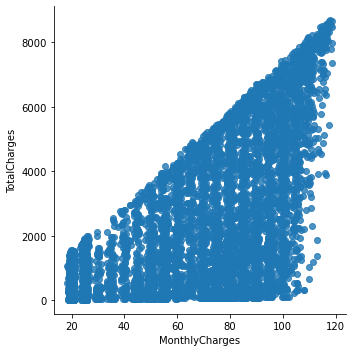

In [32]:
sns.lmplot(data=telco_data_dummies, x = 'MonthlyCharges', y = 'TotalCharges', fit_reg = False)

In [33]:
# total charges increase as monthly charges increases so they are highly correlated

In [34]:
corr_matrix = telco_data_dummies.corr()

<AxesSubplot:>

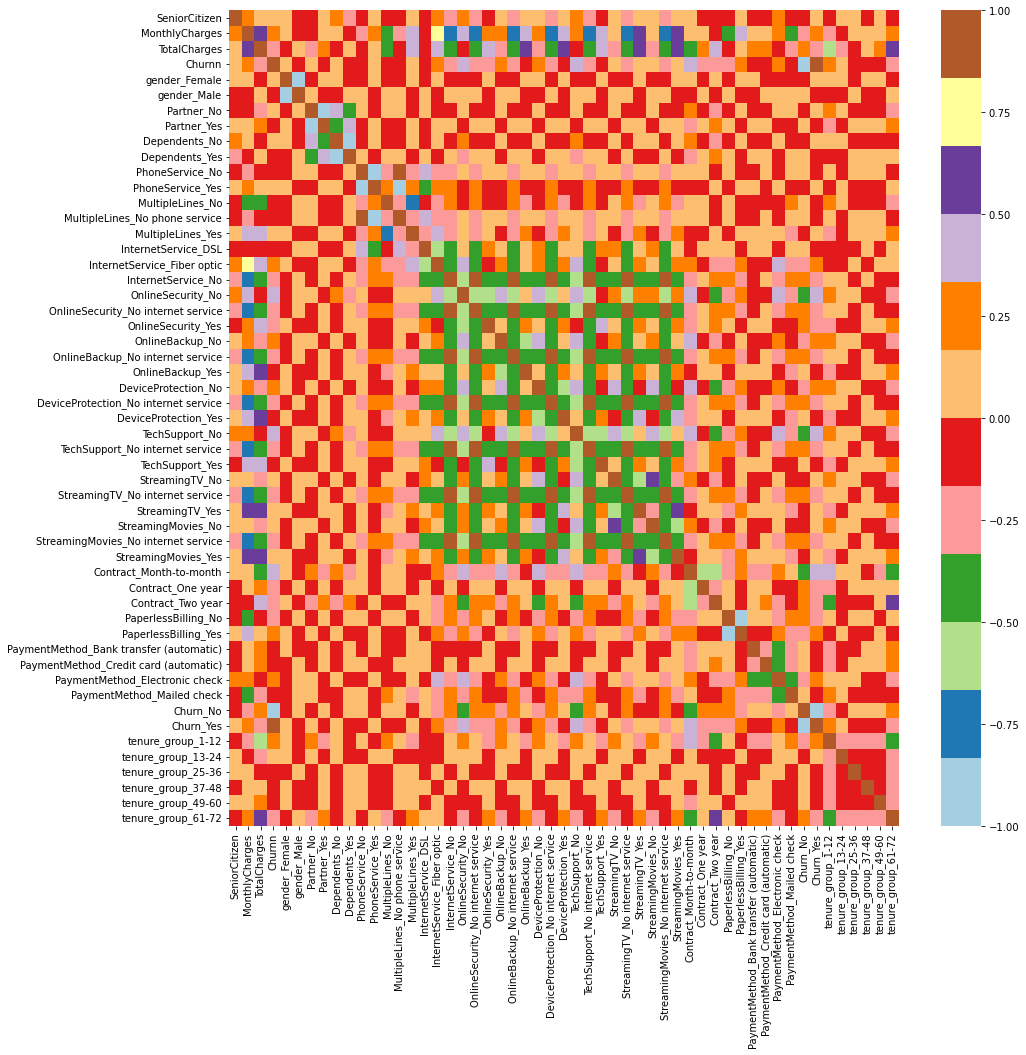

In [35]:
plt.figure(figsize=(15,15))
sns.heatmap(corr_matrix, cmap = 'Paired')

<AxesSubplot:>

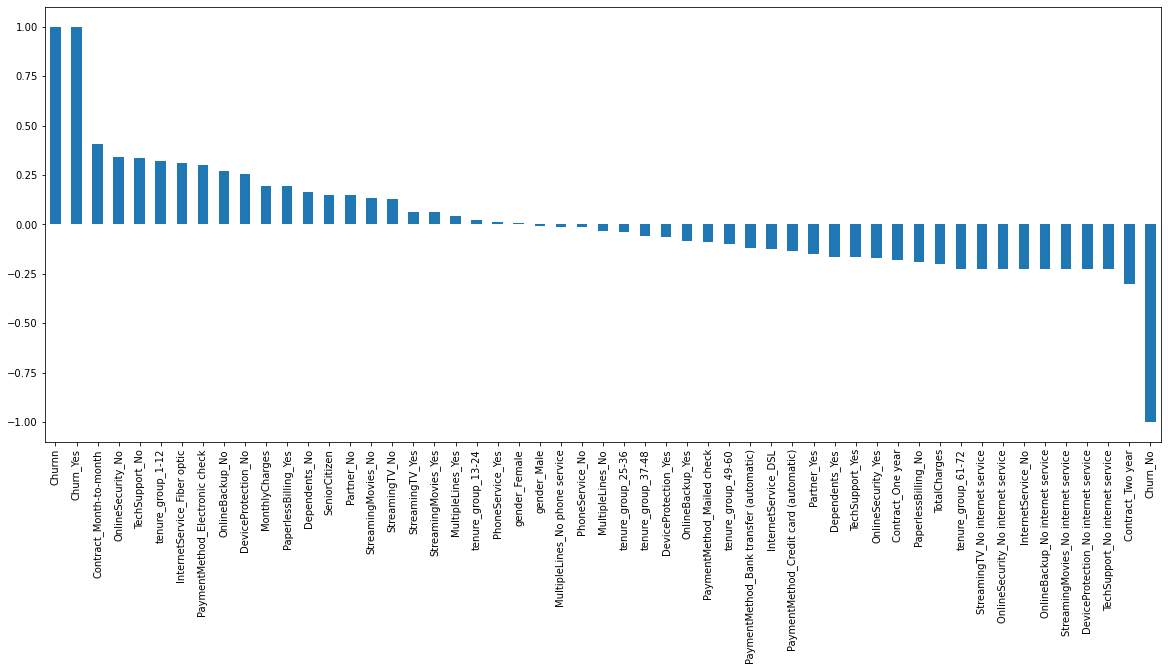

In [36]:
plt.figure(figsize=(20,8))
telco_data_dummies.corr()['Churnn'].sort_values(ascending=False).plot(kind='bar')

In [37]:
telco_data_dummies1 =pd.get_dummies(telco_data,drop_first = True)

<AxesSubplot:>

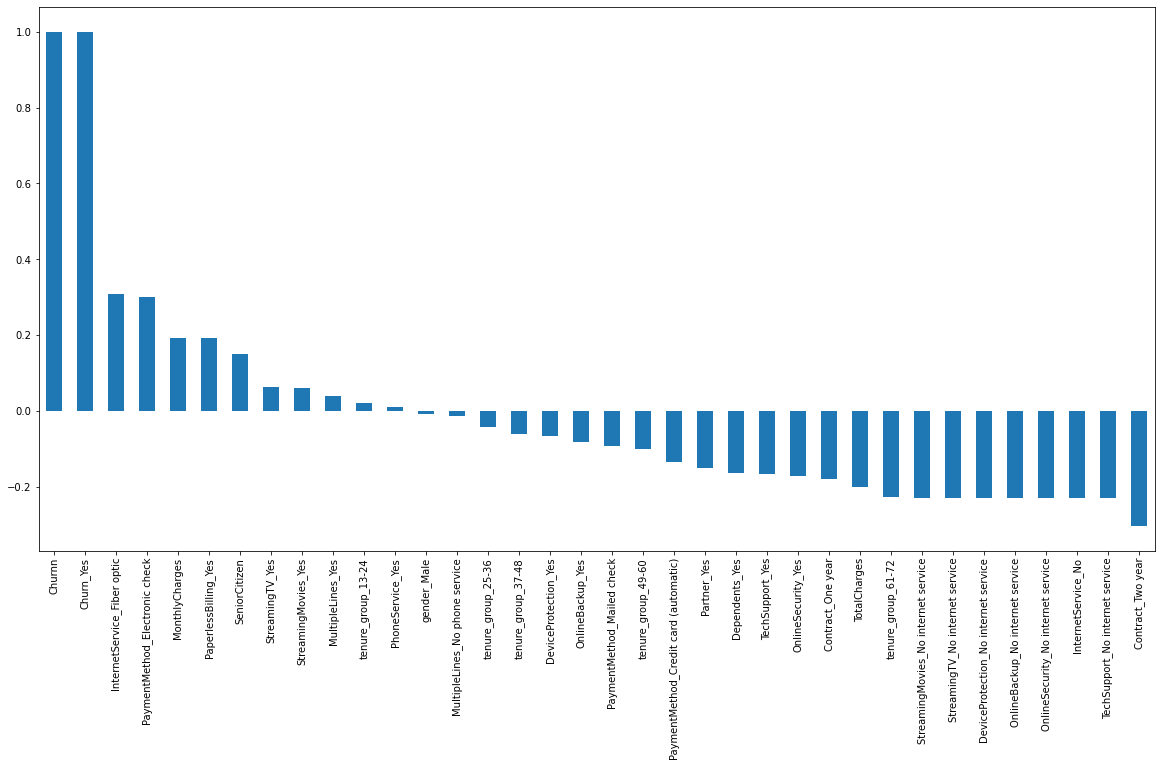

In [38]:
plt.figure(figsize=(20,10))
telco_data_dummies1.corr()['Churnn'].sort_values(ascending=False).plot(kind='bar')

the insights
high churn seen in= month to month contracts, No online security, no tech support,, first year of supscriptions and fibre optics internet

low churns seen in= long term contracts, subsriptions without internet service and the costumers more then 4 years

bivariate analysis

In [39]:
new_df1_target0 = telco_data.loc[telco_data['Churnn']==0]
new_df1_target1 = telco_data.loc[telco_data['Churnn']==1]

In [40]:
def uniplot(df,col,title,hue = None):
    
    sns.set_style('whitegrid')
    sns.set_content('talk')
    plt.rcparams['axes.labelsize']*20
    plt.rcparams['axes.titlesize']*22
    plt.rcparams['axes.titlepad']*30
    
    temp = pd.Series(data=hue)
    fig, ax = plt.subplots
    widft = len(df[col].unique()) +7 + 4*len(temp.unique())
    fig.set_size_inches(width, 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.coiuntplot(data = df, x= col, order = df[col].value_counts().index,hue=hue,palette='bright')
    plt.show

 conclusion
 insights
 1: electronic medium are high churners
 2: contract type monthly are more likely to churn
 3: no online security no tech support are high churners
 4: senior are low churners
 5: non seniors are high churners

In [41]:
# saving the dataset now for model building

In [44]:
telco_data_dummies.to_csv('telc_churn.csv')

now we have new dataset to work on which is good and easy tp understand

In [46]:
df = pd.read_csv('telc_churn.csv')

[Unnamed: 0  SeniorCitizen  MonthlyCharges  TotalCharges  Churnn  gender_Female  gender_Male  Partner_No  Partner_Yes  Dependents_No  Dependents_Yes  PhoneService_No  PhoneService_Yes  MultipleLines_No  MultipleLines_No phone service  MultipleLines_Yes  InternetService_DSL  InternetService_Fiber optic  InternetService_No  OnlineSecurity_No  OnlineSecurity_No internet service  OnlineSecurity_Yes  OnlineBackup_No  OnlineBackup_No internet service  OnlineBackup_Yes  DeviceProtection_No  DeviceProtection_No internet service  DeviceProtection_Yes  TechSupport_No  TechSupport_No internet service  TechSupport_Yes  StreamingTV_No  StreamingTV_No internet service  StreamingTV_Yes  StreamingMovies_No  StreamingMovies_No internet service  StreamingMovies_Yes  Contract_Month-to-month  Contract_One year  Contract_Two year  PaperlessBilling_No  PaperlessBilling_Yes  PaymentMethod_Bank transfer (automatic)  PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  PaymentMethod_Mailed ch

In [53]:
df.isnull().sum()

Unnamed: 0                                  0
SeniorCitizen                               0
MonthlyCharges                              0
TotalCharges                               11
Churnn                                      0
gender_Female                               0
gender_Male                                 0
Partner_No                                  0
Partner_Yes                                 0
Dependents_No                               0
Dependents_Yes                              0
PhoneService_No                             0
PhoneService_Yes                            0
MultipleLines_No                            0
MultipleLines_No phone service              0
MultipleLines_Yes                           0
InternetService_DSL                         0
InternetService_Fiber optic                 0
InternetService_No                          0
OnlineSecurity_No                           0
OnlineSecurity_No internet service          0
OnlineSecurity_Yes                

In [55]:
df.loc[telco_data['TotalCharges'].isnull()==True]

,Unnamed: 0,SeniorCitizen,MonthlyCharges,TotalCharges,Churnn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes,tenure_group_1-12,tenure_group_13-24,tenure_group_25-36,tenure_group_37-48,tenure_group_49-60,tenure_group_61-72
488,488,0,52.55,NaN,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
753,753,0,20.25,NaN,0,0,1,1,0,0,...,0,1,1,0,0,0,0,0,0,0
936,936,0,80.85,NaN,0,1,0,0,1,0,...,0,1,1,0,0,0,0,0,0,0
1082,1082,0,25.75,NaN,0,0,1,0,1,0,...,0,1,1,0,0,0,0,0,0,0
1340,1340,0,56.05,NaN,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
3331,3331,0,19.85,NaN,0,0,1,0,1,0,...,0,1,1,0,0,0,0,0,0,0
3826,3826,0,25.35,NaN,0,0,1,0,1,0,...,0,1,1,0,0,0,0,0,0,0
4380,4380,0,20.00,NaN,0,1,0,0,1,0,...,0,1,1,0,0,0,0,0,0,0
5218,5218,0,19.70,NaN,0,0,1,0,1,0,...,0,1,1,0,0,0,0,0,0,0
6670,6670,0,73.35,NaN,0,1,0,0,1,0,...,0,1,1,0,0,0,0,0,0,0


In [58]:
df = df.dropna(subset=['TotalCharges'])

In [59]:
df.to_csv('telc_churn.csv')

In [61]:
df = df.drop('Churn_Yes',axis=1)

In [64]:
df = df.drop('Churn_No',axis=1)

In [67]:
df = df.drop('Unnamed: 0',axis=1)

In [68]:
df

,SeniorCitizen,MonthlyCharges,TotalCharges,Churnn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1-12,tenure_group_13-24,tenure_group_25-36,tenure_group_37-48,tenure_group_49-60,tenure_group_61-72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,84.80,1990.50,0,0,1,0,1,0,1,...,0,0,0,1,0,1,0,0,0,0
7039,0,103.20,7362.90,0,1,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,1
7040,0,29.60,346.45,0,1,0,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0
7041,1,74.40,306.60,1,0,1,0,1,1,0,...,0,0,0,1,1,0,0,0,0,0


In [69]:
df.to_csv('telc_churn.csv')